In [136]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [353]:
data = pd.read_excel('data.xlsx')

# 1.	Preliminary analysis:
    1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates etc.
    2. Based on the findings from the previous question remove duplicates (if any) , treat missing values using appropriate strategy.


## Understanding the data

In [227]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# finding duplicates

In [229]:
duplicated_data = data[data.duplicated()]

print(f"duplicated data : {duplicated_data}")
sum_duplicated_data = data.duplicated().sum()
print(f"summation of duplicated data : {sum_duplicated_data}")

duplicated data :      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
summation of duplicated data : 1


## we can remove the duplicate

In [230]:
data.drop_duplicates(inplace = True)

data.reset_index(drop = True, inplace = True)

data.duplicated().sum()

0

    A. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

## exactly 1 duplicate row may be removed

In [231]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# based on data description :
sex   -> sex male = 1 female = 0
cp    -> chest pain type
fbs   -> fasting blood sugar 0 = lower than 120 mg/dl 1 = greater than 120 mg/dl
exang -> exercise induced angina 0 = No 1 = Yes
slope -> 0 = upsloping 1 = flat 2 = downsloping
thal  -> thalessimia 1 = normal 2 = fixed defect 3 = reversible defect

## Changing variable names to more representative names 

In [354]:
data.rename({
    'cp':'chest_pain_type',
    'trestbps':'resting_blood_pressure',
    'chol':'cholesterol',
    'fbs':'fasting_blood_sugar',
    'restecg':'resting_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'st_depression',
    'slope':'st_slope',
    'ca':'major_vessels',
    'thal':'thalessimia'
}, axis=1,inplace=True)

In [355]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

    B. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot 

## creating a list of categorical columns for explicit understanding

In [334]:
cat = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']

# Statistical Description

In [335]:
df = data[cat].describe()

In [236]:
from IPython.display import display, HTML

df_description = pd.DataFrame(df)

nuinque = df.nunique()
unique = df.apply(lambda x: x.unique().tolist())

result = pd.DataFrame({
    'nuinque': nuinque,
    'unique': unique
}).transpose()
display(HTML(result.to_html()))

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
nuinque,5,7,5,5,6,6
unique,"[302.0, 0.6821192052980133, 0.466425738067264, 0.0, 1.0]","[302.0, 0.9635761589403974, 1.0320436419542325, 0.0, 1.0, 2.0, 3.0]","[302.0, 0.1490066225165563, 0.3566860293648133, 0.0, 1.0]","[302.0, 0.32781456953642385, 0.4701959640097687, 0.0, 1.0]","[302.0, 1.3973509933774835, 0.6162739844441464, 0.0, 1.0, 2.0]","[302.0, 2.314569536423841, 0.6130255397814742, 0.0, 2.0, 3.0]"


In [237]:
data.thalessimia.value_counts()

thalessimia
2    165
3    117
1     18
0      2
Name: count, dtype: int64

In [238]:
data.loc[data.thalessimia == 0, 'thalessimia'] = 2

#### Note :
- thalessimia has 4 unique categories according to data however in description there are only 3.
- there are 2 records which are identified as '0' ; these can be seen as missing values and hence need to be imputed.
- for imputation we can put in the category with modal value of '2'

### converting the numeric categories for each column to relevent descriptors

In [356]:
data.loc[data.sex==0,'sex'] = 'female'
data.loc[data.sex==1, 'sex'] = 'male'

data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
data.loc[data.chest_pain_type == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2 ,'chest_pain_type'] = 'non-anginal pain'
data.loc[data.chest_pain_type == 3 ,'chest_pain_type'] = 'asymptomatic'

data.loc[data.fasting_blood_sugar == 0, 'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1 ,'fasting_blood_sugar'] = '> 120mg/ml'

data.loc[data.resting_ecg == 0 ,'resting_ecg'] = 'normal'
data.loc[data.resting_ecg == 1 ,'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 ,'resting_ecg'] = 'hyper'

data.loc[data.exercise_induced_angina == 0,'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'


data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'

data.loc[data.thalessimia == 1,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 2,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable defect'

data.loc[data.target == 0, 'target']= 'Disease -'
data.loc[data.target == 1, 'target']= 'Disease +'

In [357]:
dsprsnt = data[data.target == 'Disease +'].copy()
dsabsnt = data[data.target == 'Disease -'].copy()

In [241]:
dsprsnt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,male,asymptomatic,145,233,> 120mg/ml,normal,150,no,2.3,upsloping,0,normal,Disease +
1,37,male,non-anginal pain,130,250,< 120mg/ml,abnormal,187,no,3.5,upsloping,0,fixed defect,Disease +
2,41,female,atypical angina,130,204,< 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,Disease +
3,56,male,atypical angina,120,236,< 120mg/ml,abnormal,178,no,0.8,downsloping,0,fixed defect,Disease +
4,57,female,typical angina,120,354,< 120mg/ml,abnormal,163,yes,0.6,downsloping,0,fixed defect,Disease +


# Target Distribution

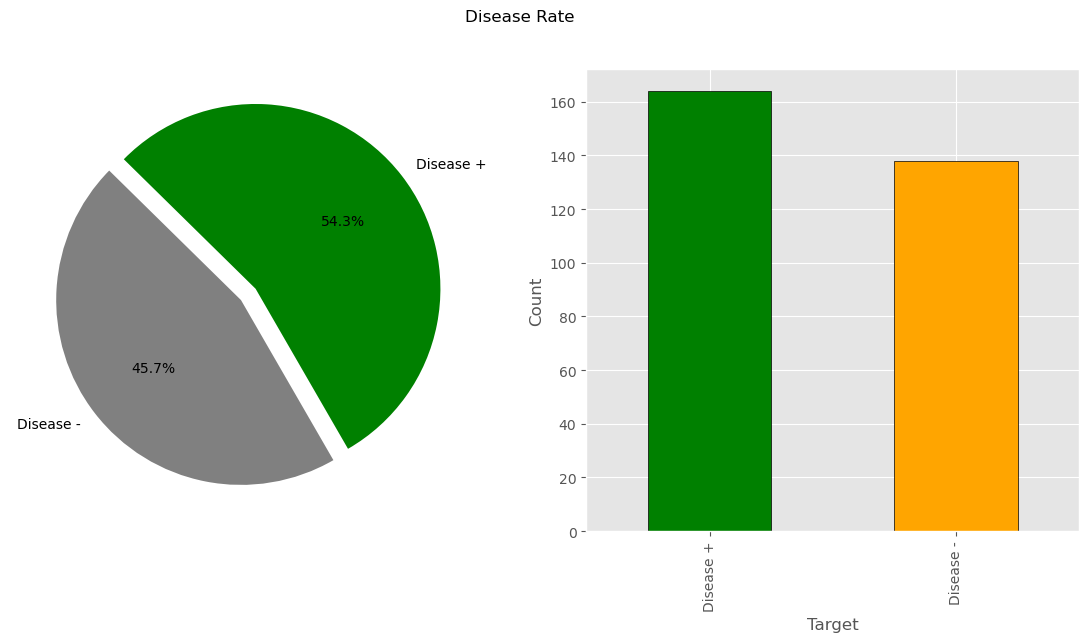

In [242]:
value_count = data.target.value_counts()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

value_count.plot.pie(explode=[0.1,0],autopct='%1.1f%%', startangle=300, colors=['green','grey'], labels=['Disease +','Disease -'],ax=ax1)

ax1.set_ylabel('')  # Hide the y-label for better appearance


# histogram
value_count.plot(kind='bar', color=['green','orange'],edgecolor='black',ax=ax2)
ax2.set_title('')
ax2.set_ylabel('Count')
ax2.set_xlabel('Target')
fig.suptitle('Disease Rate')
fig.show()


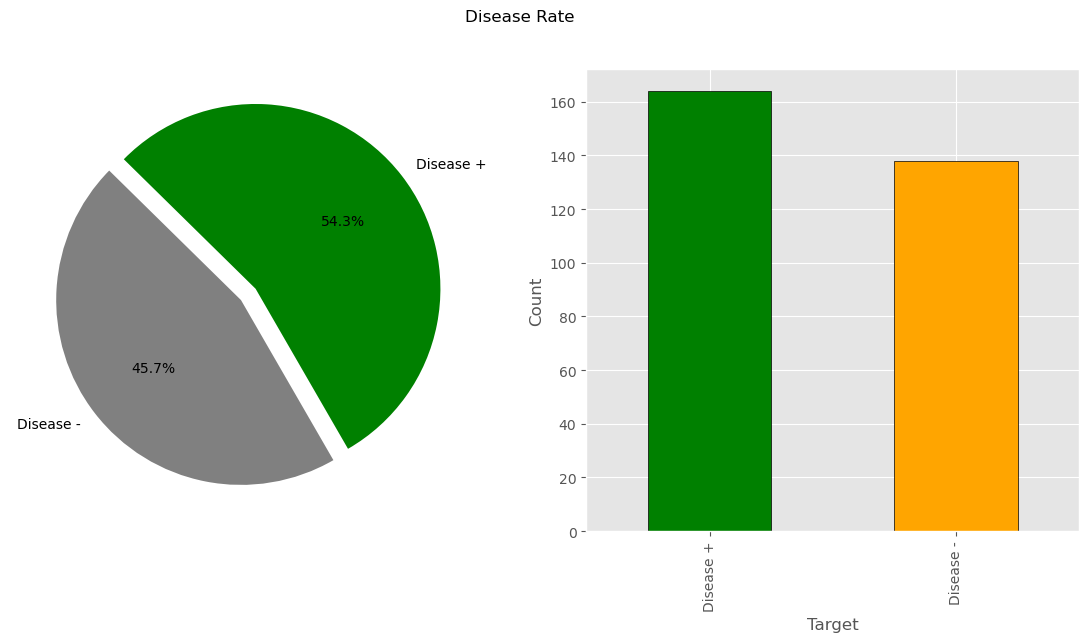

In [243]:
value_count = data.target.value_counts()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

value_count.plot.pie(explode=[0.1,0],autopct='%1.1f%%', startangle=300, colors=['green','grey'], labels=['Disease +','Disease -'],ax=ax1)

ax1.set_ylabel('')  # Hide the y-label for better appearance


# histogram
value_count.plot(kind='bar', color=['green','orange'],edgecolor='black',ax=ax2)
ax2.set_title('')
ax2.set_ylabel('Count')
ax2.set_xlabel('Target')
fig.suptitle('Disease Rate')
fig.show()


     C. Study the occurrence of CVD across Age.

77


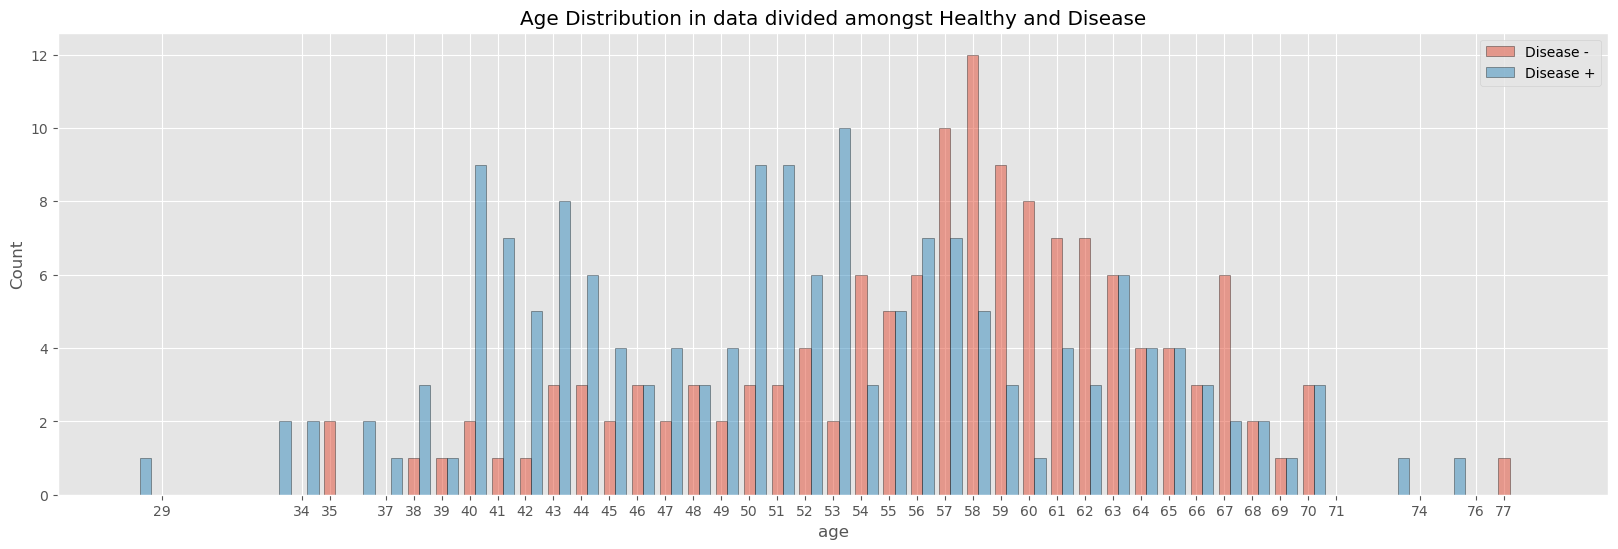

In [266]:
healthy = data[data['target'] == 'Disease -']['age']
disease = data[data['target'] == 'Disease +']['age']
print(healthy.max())
plt.figure(figsize=(20,6))

bins = np.arange(data['age'].min()-1,data['age'].max()+2,1)

width = 0.4

plt.hist(healthy,bins=bins - width /2,alpha=0.5,label='Disease -',width=width,edgecolor='black')
plt.hist(disease,bins=bins +
         width /2,alpha=0.5,label='Disease +',width=width,edgecolor='black')

plt.xticks(np.unique(data['age']))

plt.title('Age Distribution in data divided amongst Healthy and Disease')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend()
plt.show()

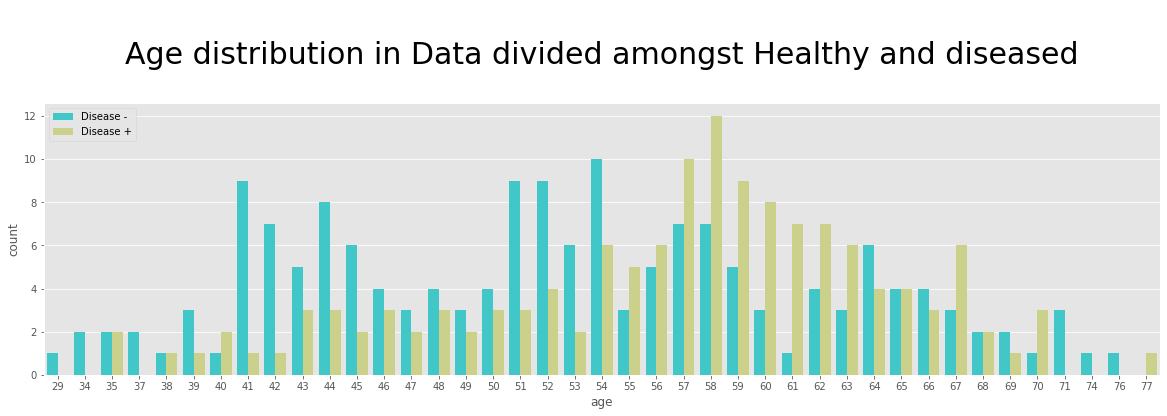

findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.


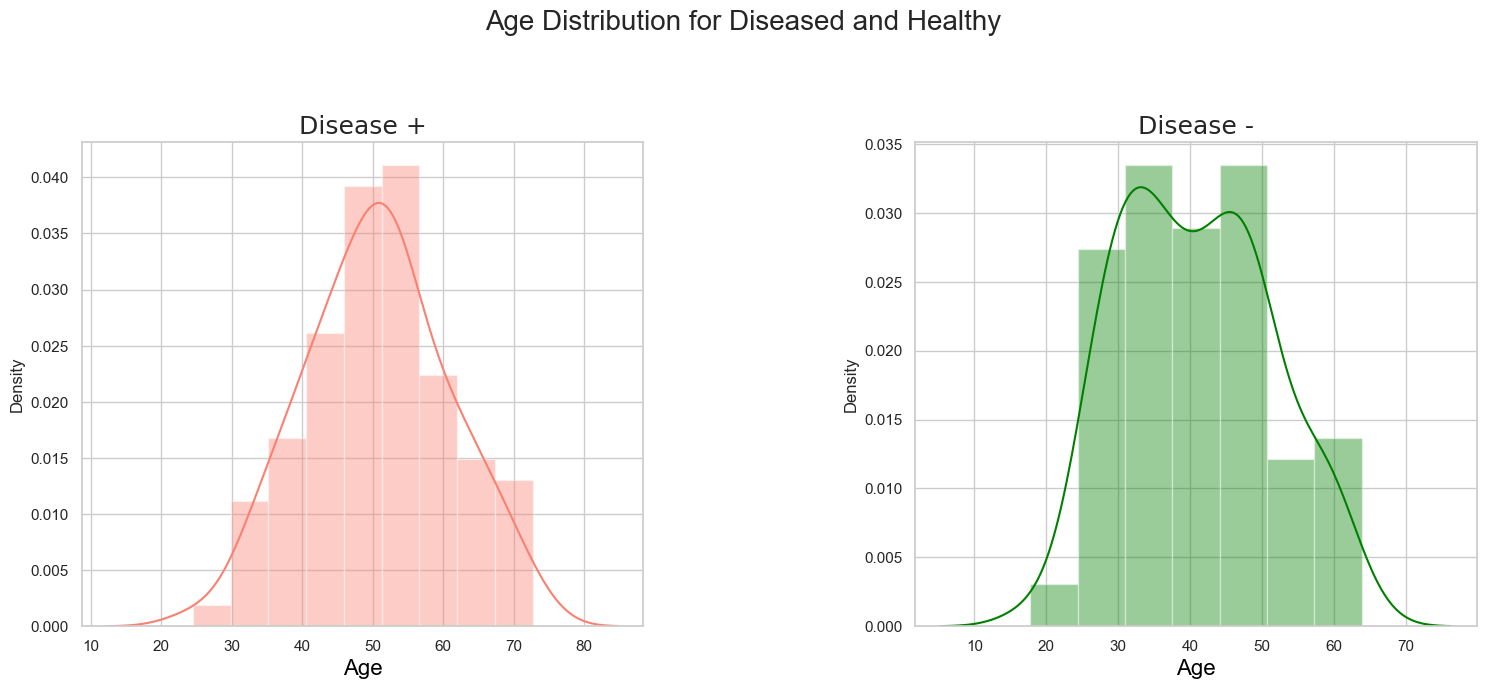

In [344]:
f,axes = plt.subplots(1,2, figsize = (15,7))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'salmon')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'green')
axes[0].set_title('Disease +',fontdict = {'family': 'times','size': 18})
axes[1].set_title('Disease -',fontdict = {'family': 'times','size': 18})
axes[0].set_xlabel('Age', fontdict = {'color': 'black','weight': 'normal','size': 16})
axes[1].set_xlabel('Age',fontdict = {'color': 'black','weight': 'normal','size': 16})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 20)
plt.tight_layout(w_pad= 12, pad = 1 )
plt.show()

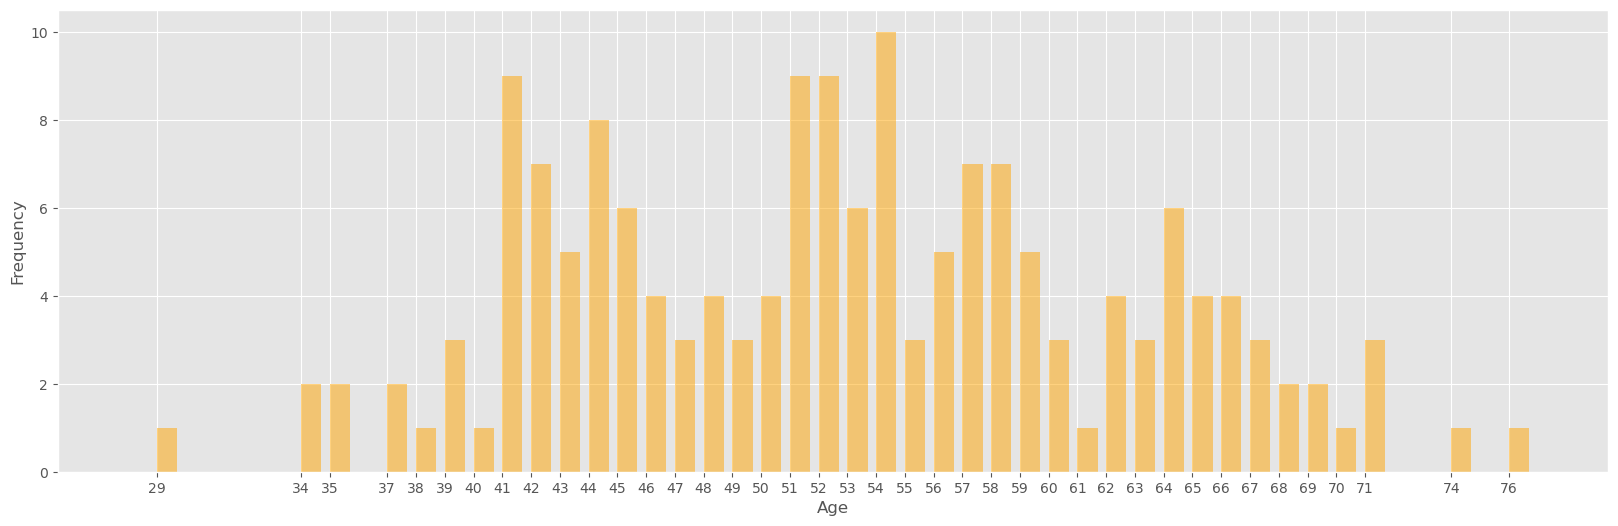

In [296]:
plt.figure(figsize=(20,6))
disease = data[data['target'] == 'Disease +']['age']
bins = np.arange(disease.min()-1,disease.max()+2,1)

# sns.histplot(disease,bins=bins,kde=False,color='orange',alpha=0.6,binwidth=0.9)


plt.hist(disease,bins=bins,alpha=0.5,width=0.7,color='orange')
plt.xticks(np.unique(disease))
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


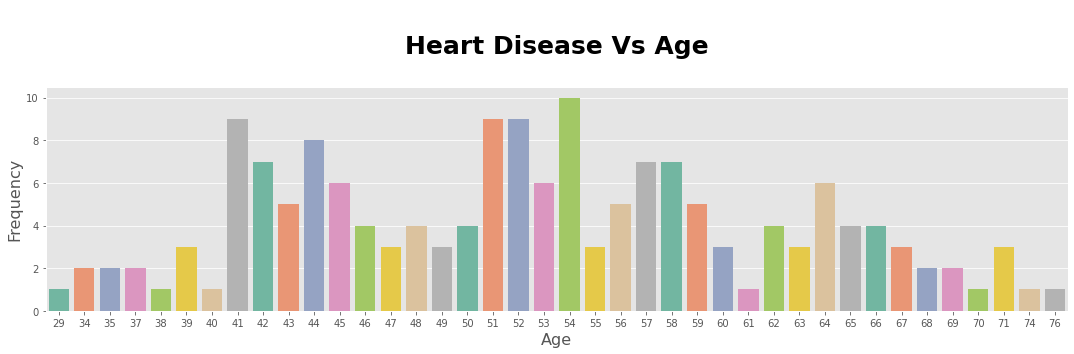

#### Note :

## the chart shows that, people mostly get heart disease between 40 to 60

      sex     target  count
0  female  Disease +     72
1  female  Disease -     24
2    male  Disease +     93
3    male  Disease -    114
sex
male      207
female     96
Name: count, dtype: int64


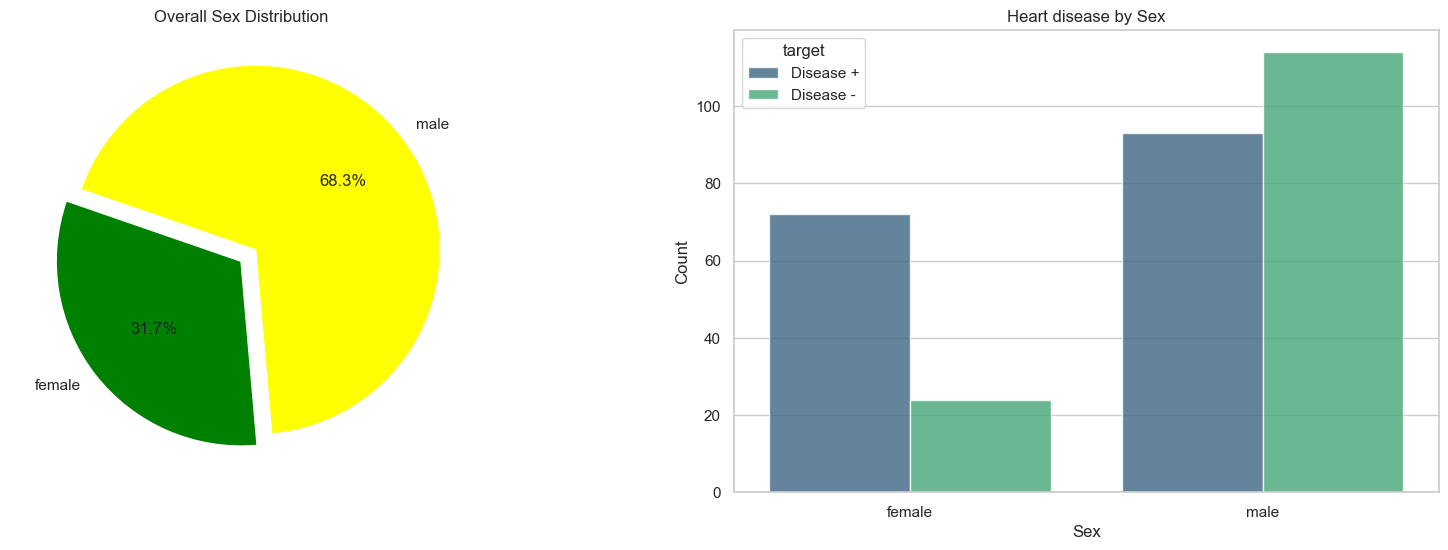

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

count_values = data.groupby(['sex', 'target']).size().reset_index(name='count')
count_gender = data['sex'].value_counts()
print(count_values)
print(count_gender)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

count_gender.plot.pie(
    explode=[0.1, 0], 
    startangle=275, 
    autopct='%1.1f%%', 
    colors=['yellow', 'green'], 
    ax=ax1
)

ax1.set_title('Overall Sex Distribution')
ax1.set_ylabel('')

sns.barplot(
    data=count_values, 
    x='sex', 
    y='count', 
    hue='target', 
    palette='viridis', 
    alpha=0.8, 
    ax=ax2
)
ax2.set_title('Heart disease by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
plt.show()


###       D. Study the composition of overall patients w.r.t . Gender

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


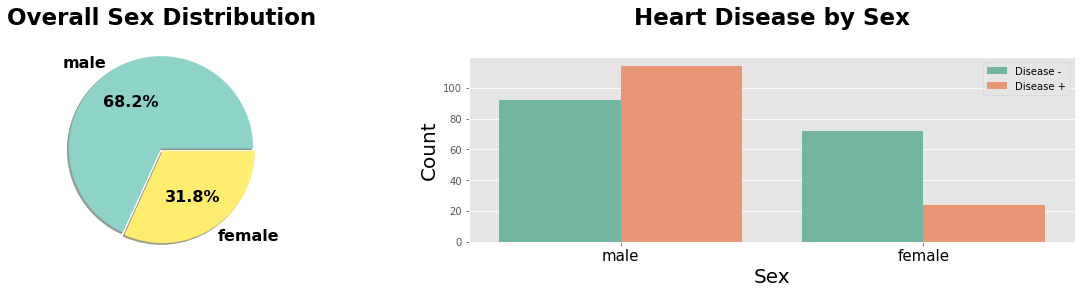

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

count_values = data.groupby(['sex', 'target']).size().reset_index(name='count')
count_gender = data['sex'].value_counts()
print(count_values)
print(count_gender)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

count_gender.plot.pie(
    explode=[0.1, 0], 
    startangle=275, 
    autopct='%1.1f%%', 
    colors=['yellow', 'green'], 
    ax=ax1
)

ax1.set_title('Overall Sex Distribution')
ax1.set_ylabel('')

sns.barplot(
    data=count_values, 
    x='sex', 
    y='count', 
    hue='target', 
    palette='viridis', 
    alpha=0.8, 
    ax=ax2
)
ax2.set_title('Heart disease by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
plt.show()


# E. Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?

In [340]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

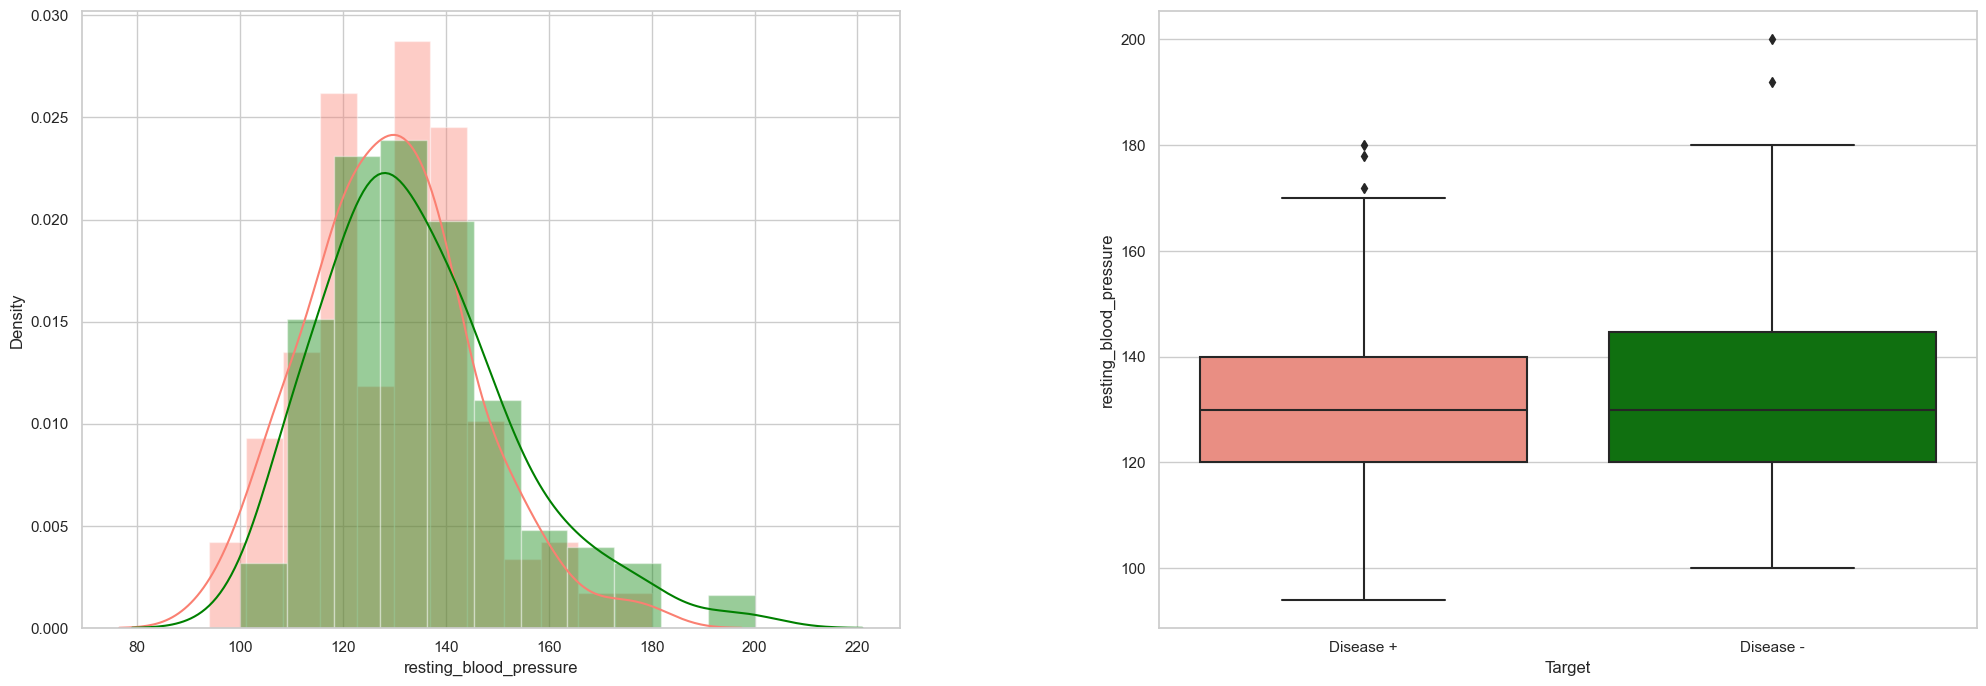

In [352]:
f,axes = plt.subplots(1,2,figsize=(20,7))
sns.distplot(dsprsnt.resting_blood_pressure,ax=axes[0],color='salmon')
sns.distplot(dsabsnt.resting_blood_pressure,ax=axes[0],color='green')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('resting_blood_pressure')


desprsnt_dsabsnt = pd.concat([dsprsnt, dsabsnt])

sns.boxplot(x='target', y='resting_blood_pressure',ax=axes[1], data=desprsnt_dsabsnt, palette=['salmon', 'green'])

axes[1].set_ylabel('resting_blood_pressure')
axes[1].set_xlabel('Target')

plt.tight_layout(w_pad= 12, pad = 1 )
plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


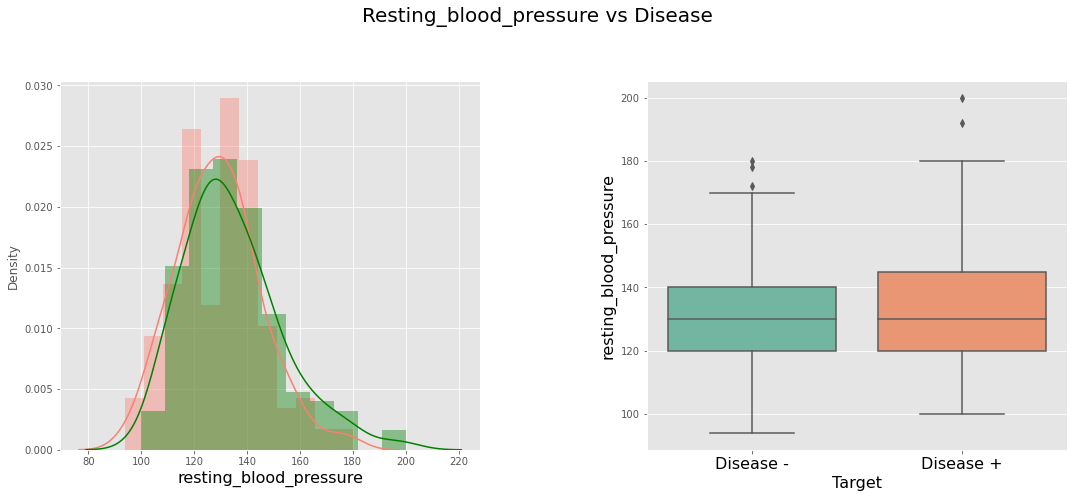

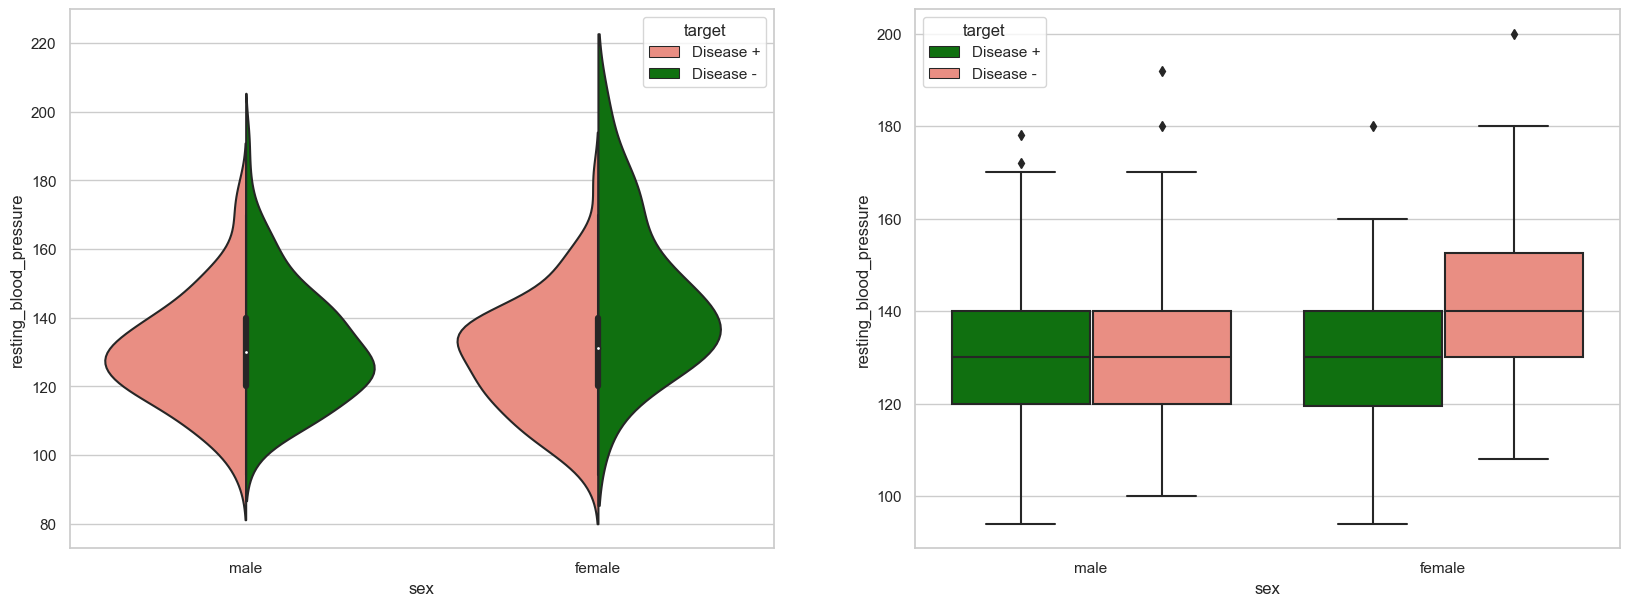

In [369]:
f,axes = plt.subplots(1,2,figsize=(20,7))

sns.boxplot(x='sex',hue='target',y='resting_blood_pressure',ax=axes[1],data=data,palette=['green','salmon'])

desprsnt_dsabsnt = pd.concat([dsprsnt, dsabsnt])
sns.violinplot(x='sex', y='resting_blood_pressure', hue='target',ax=axes[0], 
               data=data, palette=['salmon', 'green'],split=True)

plt.show()

# Resting blood pressure for male and female vs target

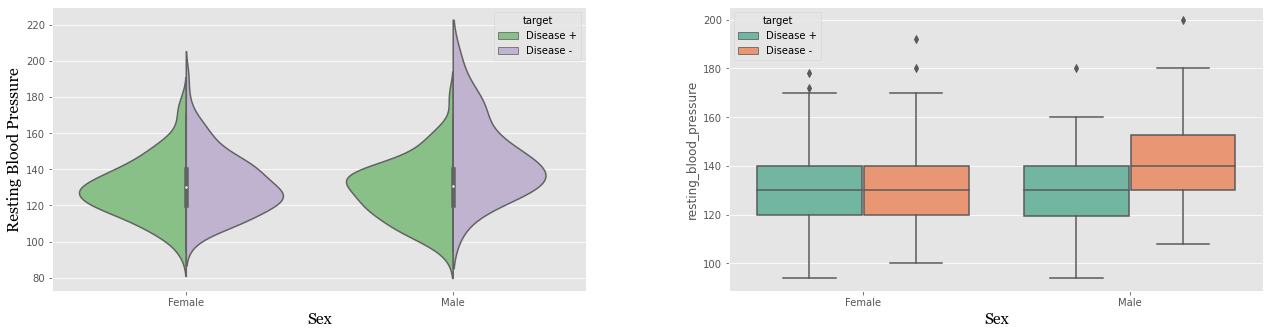

    F. Describe the relationship between Cholesterol levels and our target variable.

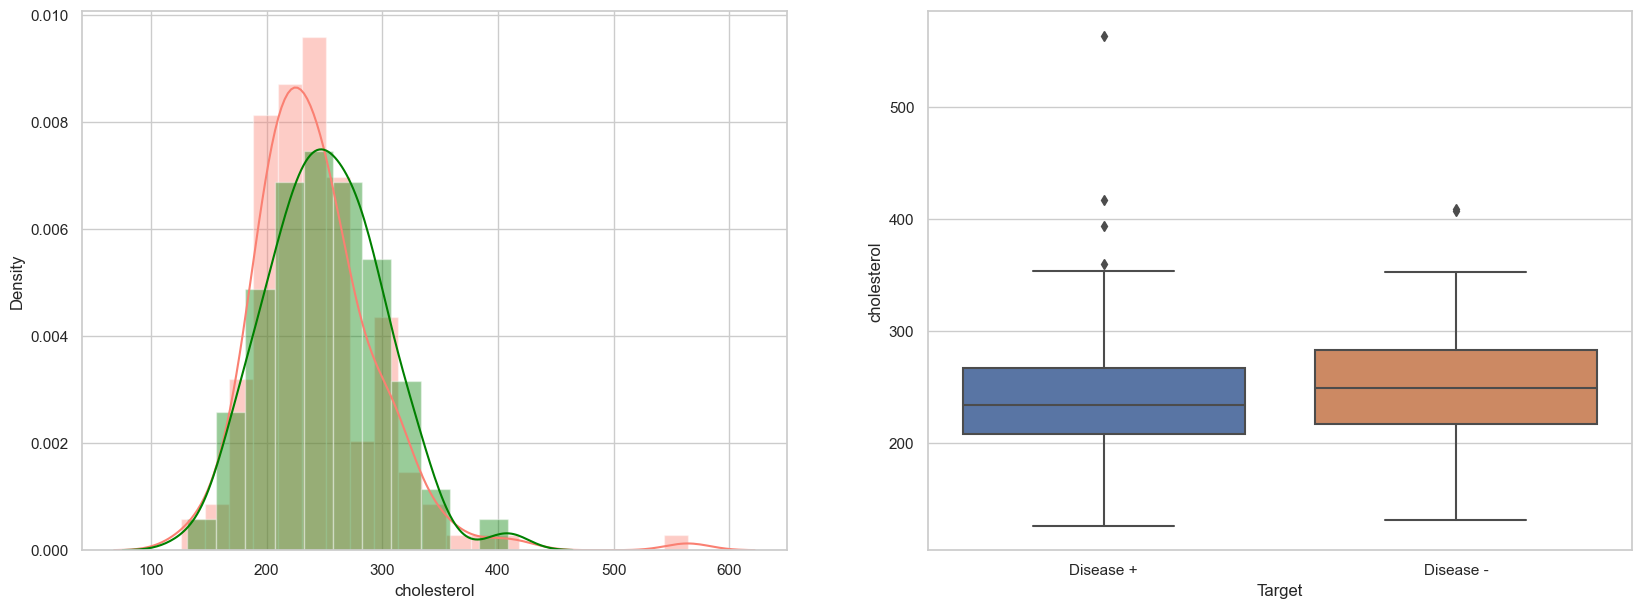

In [370]:
f,axes = plt.subplots(1,2,figsize=(20,7))
sns.distplot(dsprsnt.cholesterol,ax=axes[0],color='salmon')
sns.distplot(dsabsnt.cholesterol,ax=axes[0],color='green')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('cholesterol')

sns.boxplot(x='target',y='cholesterol',data=data)
axes[1].set_ylabel('cholesterol')
axes[1].set_xlabel('Target')

plt.show()

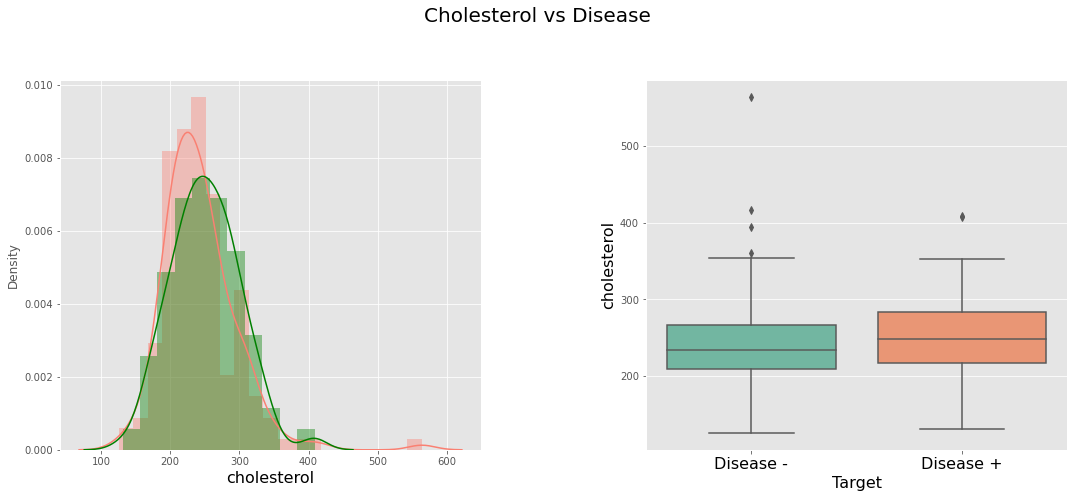

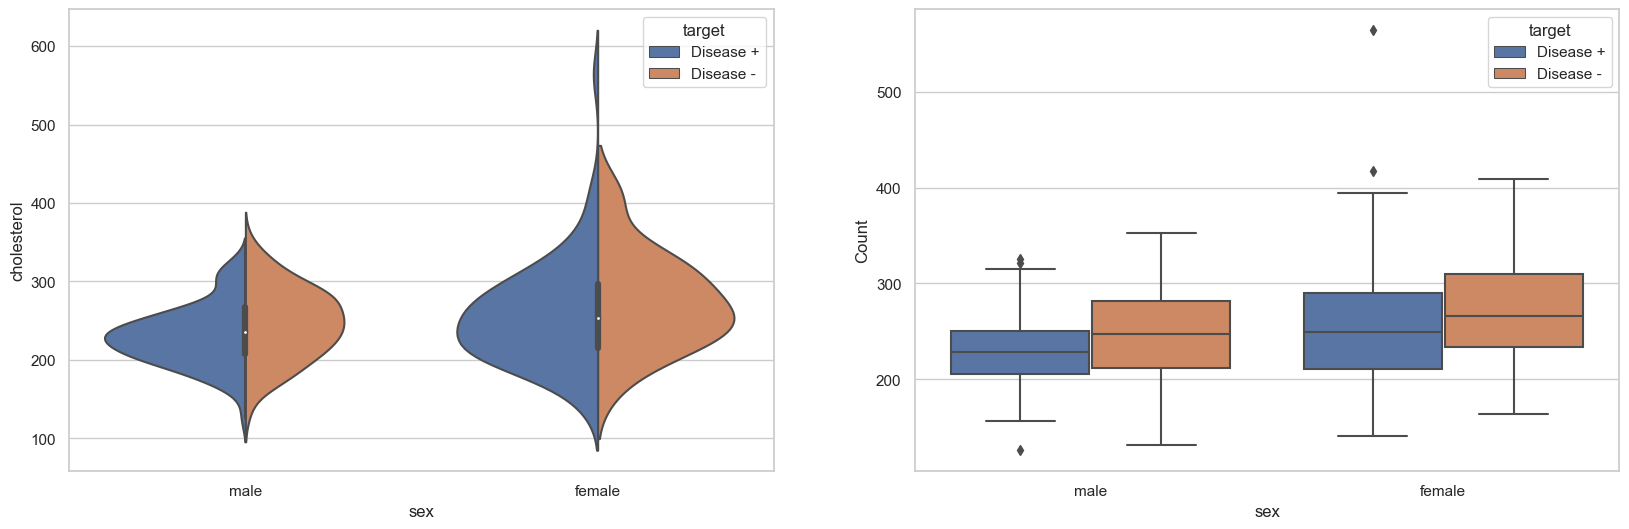

In [389]:
f,axes = plt.subplots(1,2,figsize=(20,6))

sns.violinplot(x='sex',y='cholesterol',hue='target',data=data, split=True,ax=axes[0])

sns.boxplot(x='sex',y='cholesterol',hue='target',data=data,ax=axes[1])
axes[1].set_ylabel('Count')
plt.show()


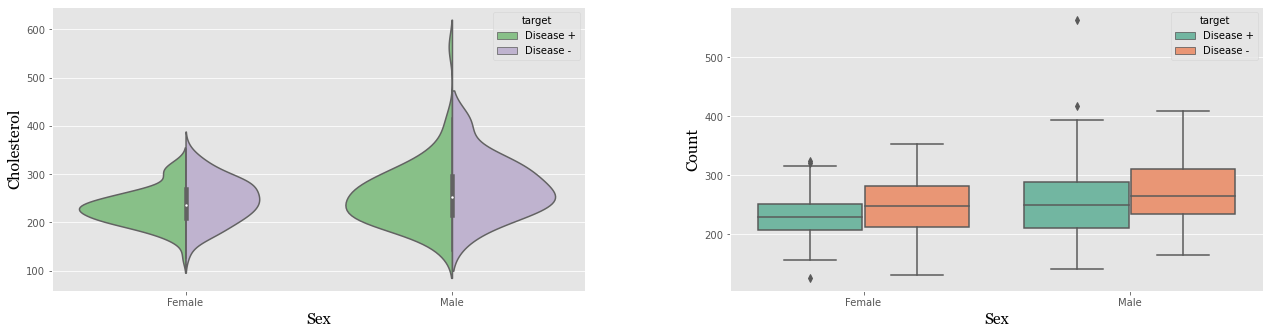

    G. What can be concluded about the relationship between peak exercising and occurrence of heart attack.

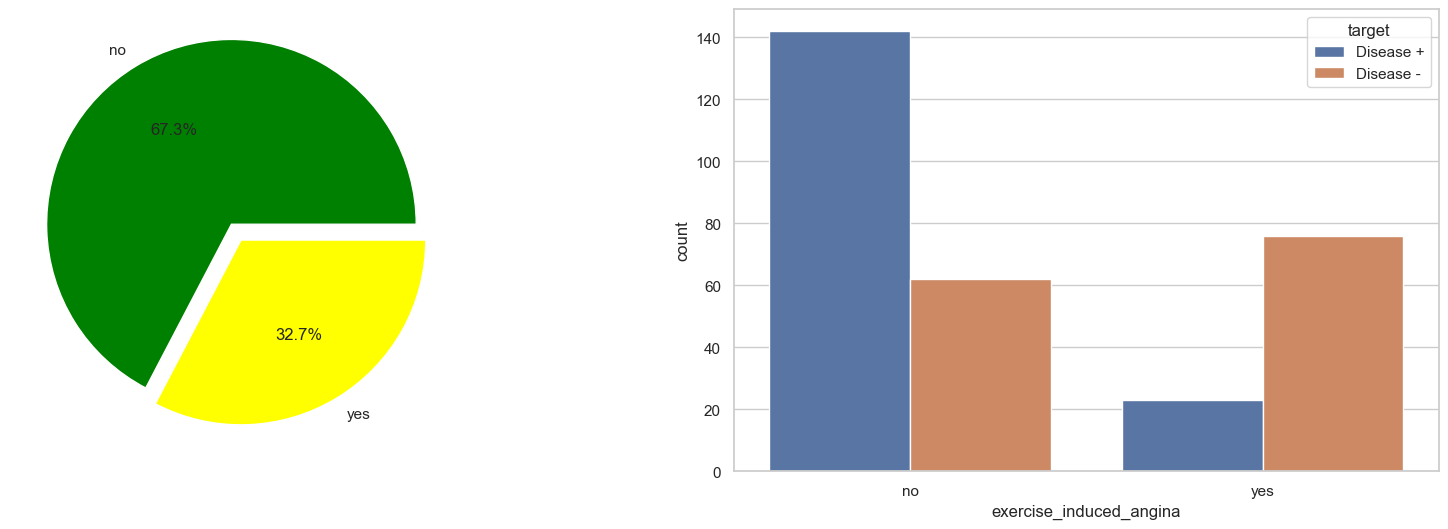

In [405]:
count_exercising = data['exercise_induced_angina'].value_counts()
count_exercising_bar = data.groupby(['exercise_induced_angina','target']).size().reset_index(name='count')
# print(count_exercising_bar)
f,axes = plt.subplots(1,2,figsize=(20,6))
count_exercising.plot.pie(
explode=[0.1,0],
autopct='%1.1f%%',
colors=['green','yellow'],
ax=axes[0])

sns.barplot(
    data=count_exercising_bar,
    x='exercise_induced_angina',
    y='count',
    hue='target',
    ax=axes[1]
    )
axes[0].set_ylabel('')
plt.show()

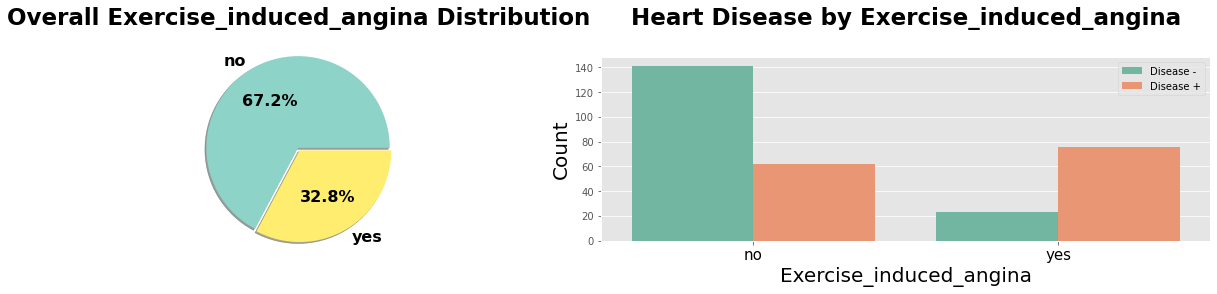

    H. Is thalassemia a major cause of CVD?

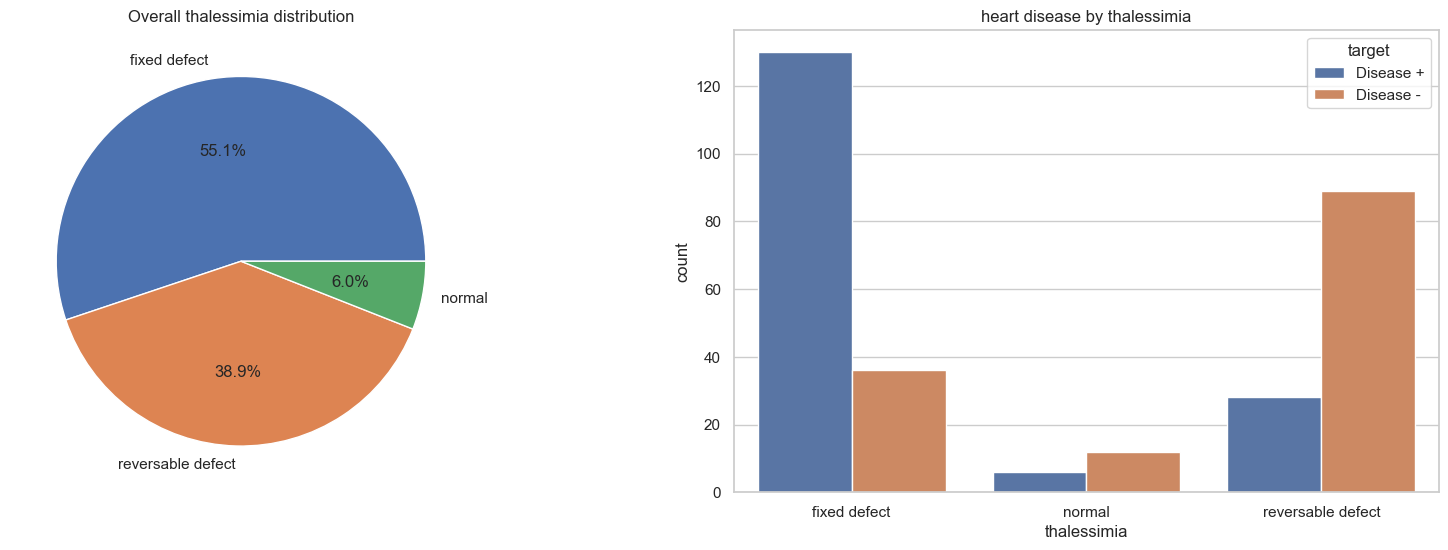

In [426]:
# data.head()
thalessimia_filter = data[data['thalessimia'] !=0]
count_thalessimia = thalessimia_filter['thalessimia'].value_counts()
f,axes = plt.subplots(1,2,figsize=(20,6))
count_thalessimia.plot.pie(
    explode=[0,0,0],
    autopct="%1.1f%%",
    ax=axes[0]    
)

count_thalessimia_bar = thalessimia_filter.groupby(['thalessimia','target']).size().reset_index(name='count')

sns.barplot(
    data=count_thalessimia_bar,
    x='thalessimia',
    y='count',
    hue='target',
    ax=axes[1]
)
axes[0].set_ylabel('')
axes[0].set_title('Overall thalessimia distribution')
axes[1].set_title('heart disease by thalessimia')

plt.show()

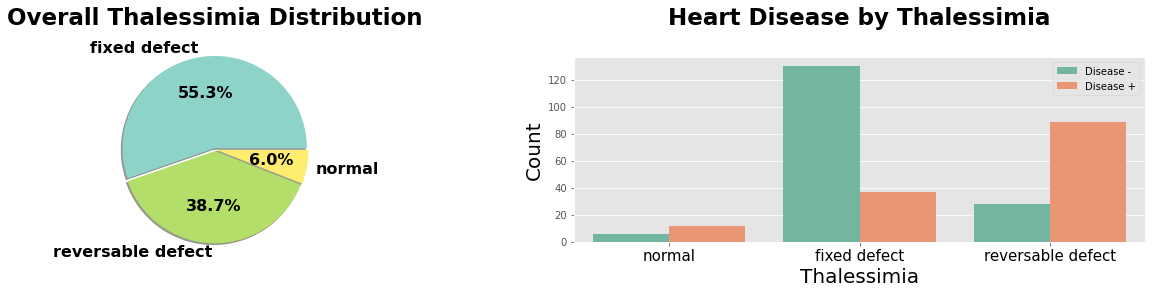

    I. How are the other factors determining the occurrence of CVD?

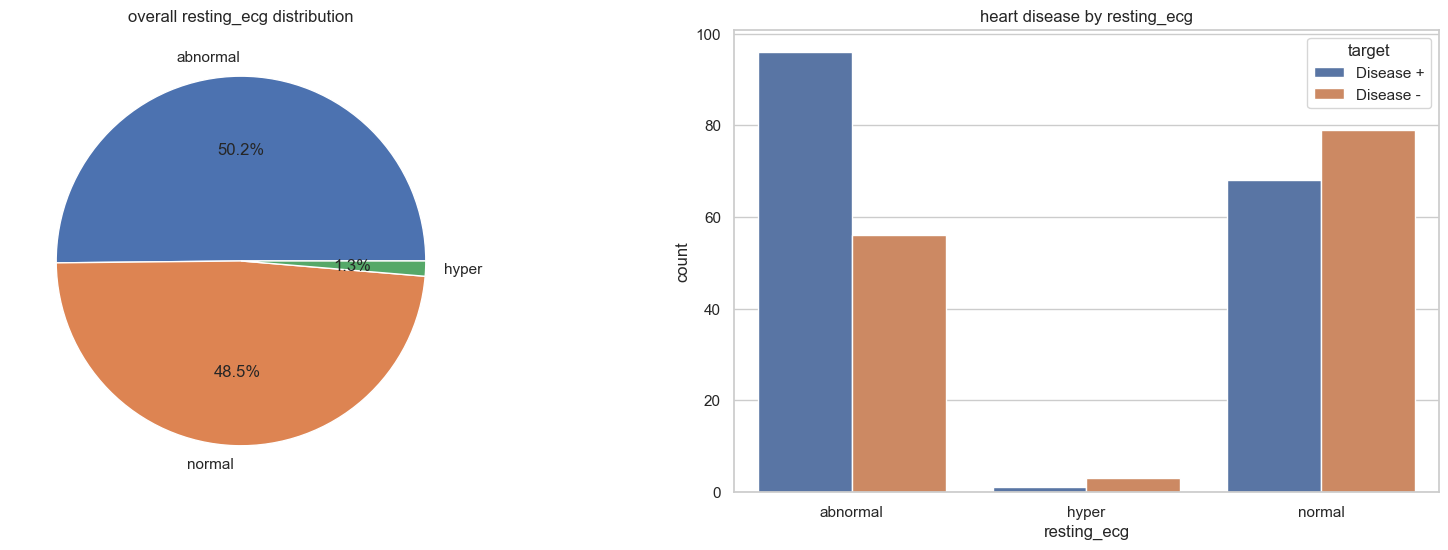

In [439]:
f,axes = plt.subplots(1,2,figsize=(20,6))

count_resting_ecg = data['resting_ecg'].value_counts()
count_resting_ecg_bar = data.groupby(['resting_ecg','target']).size().reset_index(name='count')

count_resting_ecg.plot.pie(
    explode=[0,0,0],
    autopct = '%1.1f%%',
    ax=axes[0]
)

sns.barplot(
    data=count_resting_ecg_bar,
    ax=axes[1],
    x='resting_ecg',
    y='count',
    hue='target'
)
axes[0].set_ylabel('')
axes[0].set_title('overall resting_ecg distribution')
axes[1].set_title('heart disease by resting_ecg')

plt.show()

## 1. Resting_ecg

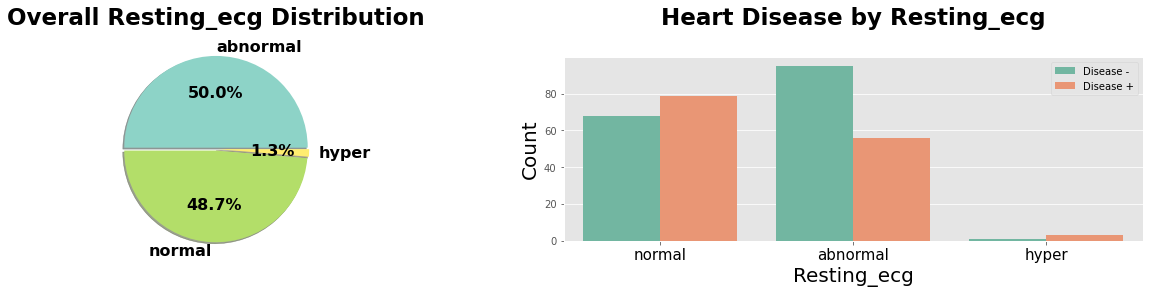

## 2. Fasting Blood Sugar

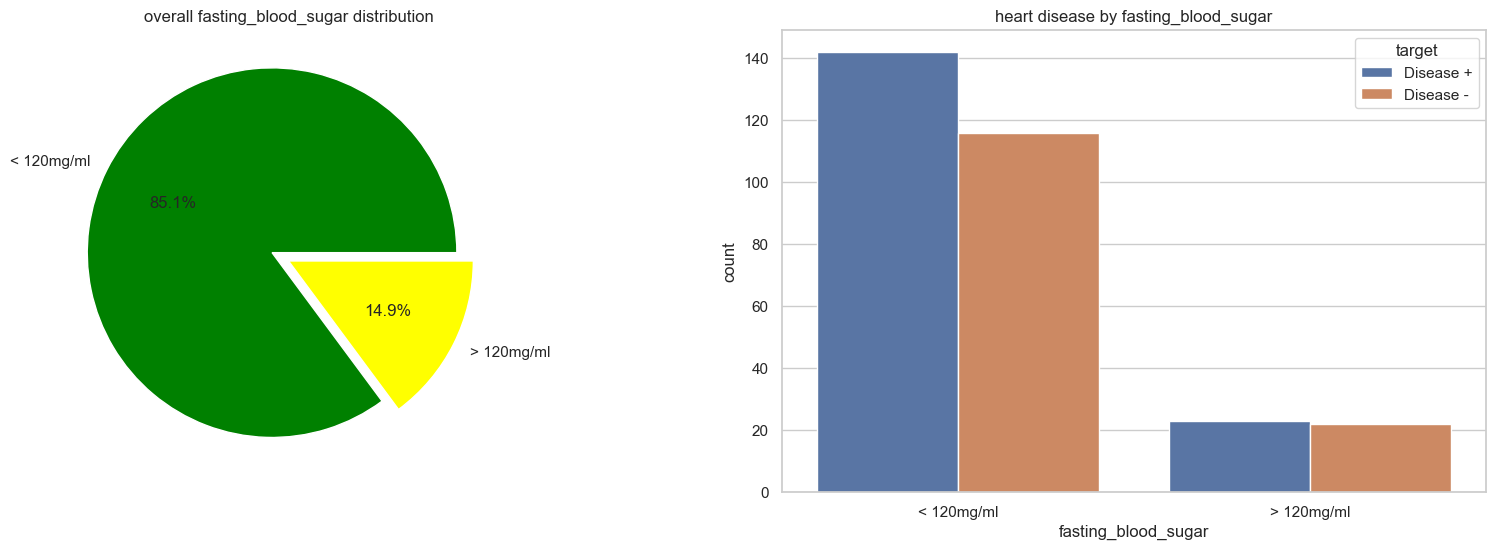

In [443]:
f,axes = plt.subplots(1,2,figsize=(20,6))
count_fasting_blood_sugar = data['fasting_blood_sugar'].value_counts()
count_fasting_blood_sugar_bar = data.groupby(['fasting_blood_sugar','target']).size().reset_index(name='count')

count_fasting_blood_sugar.plot.pie(
    explode=[0.1,0],
    autopct='%1.1f%%',
    colors=['green','yellow'],
    ax=axes[0]
)

sns.barplot(
    data=count_fasting_blood_sugar_bar,
    x='fasting_blood_sugar',
    y='count',
    hue='target',
    ax=axes[1]
)

axes[0].set_title('overall fasting_blood_sugar distribution')
axes[0].set_ylabel('')
axes[1].set_title('heart disease by fasting_blood_sugar')
plt.show()

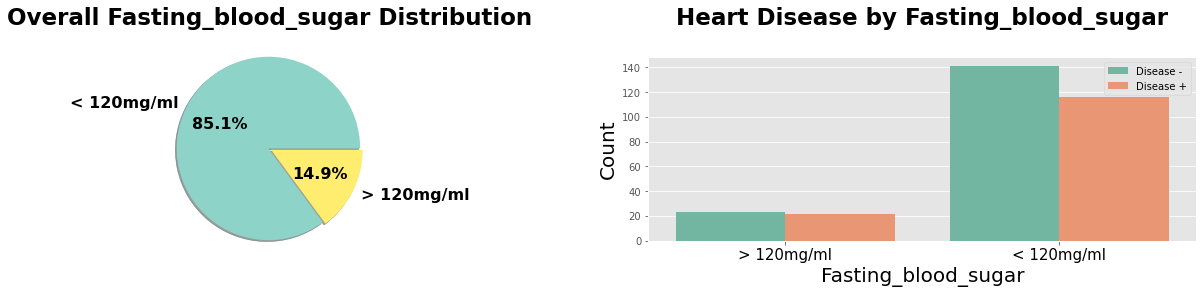

In [32]:
cat_plot('fasting_blood_sugar')

## 3. Max Heart Rate Achieved

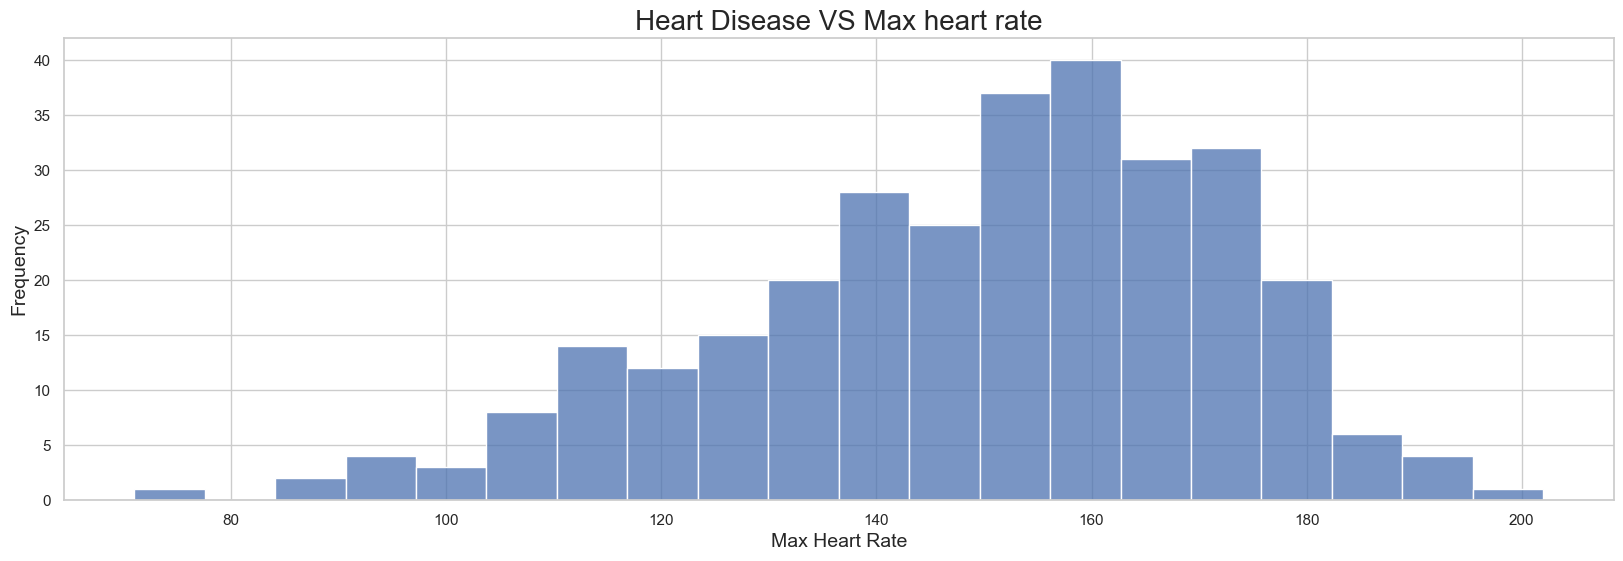

In [465]:
plt.figure(figsize=(20,6))
sns.histplot(data=data,x='max_heart_rate',bins=20)
# to create line : kde=True
plt.xlabel('Max Heart Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Heart Disease VS Max heart rate', fontsize=20)
# Show plot
plt.show()


findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


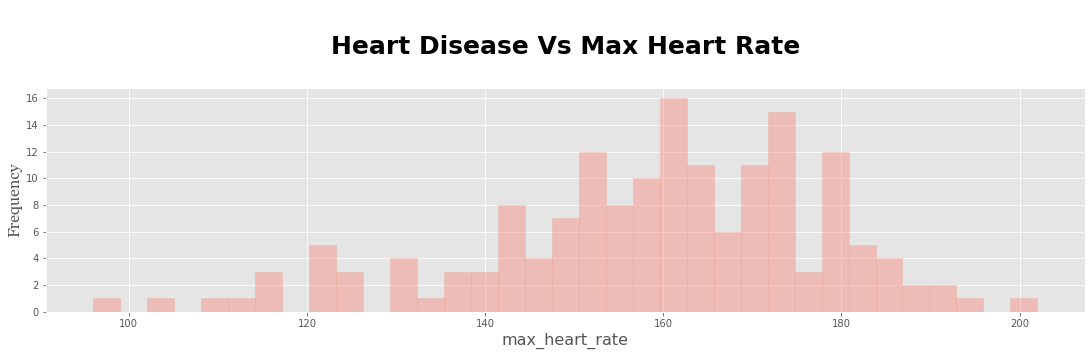

# 4. major_vessels

In [469]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

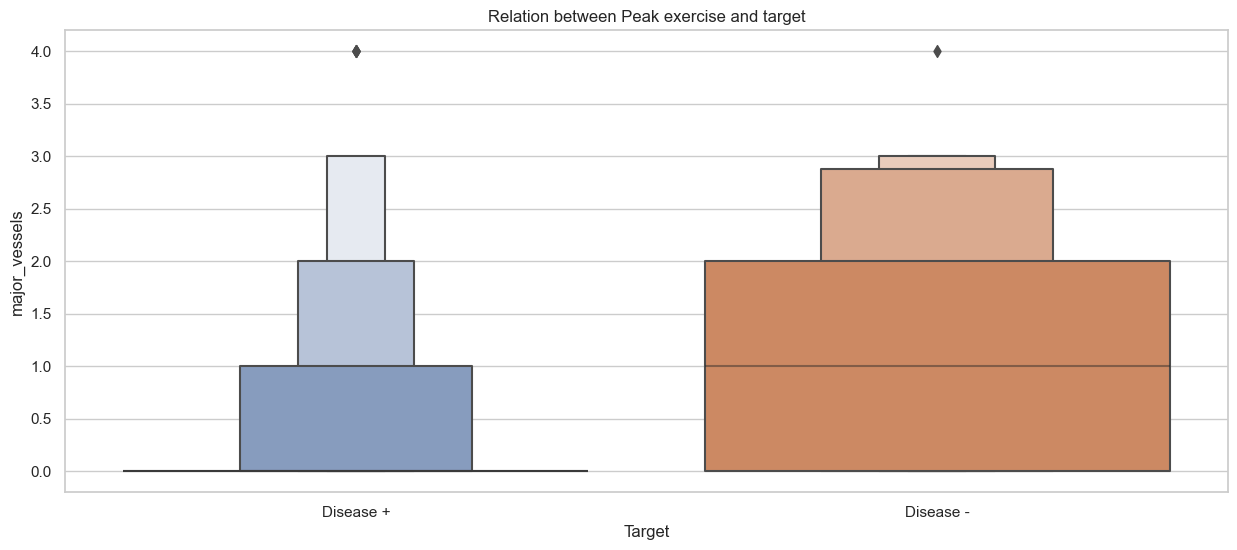

In [479]:
plt.figure(figsize=(15,6))
sns.boxenplot(
    data=data,
    y='major_vessels',
    x='target'
)
plt.title('Relation between Peak exercise and target')
plt.ylabel('major_vessels')
plt.xlabel('Target')
plt.show()

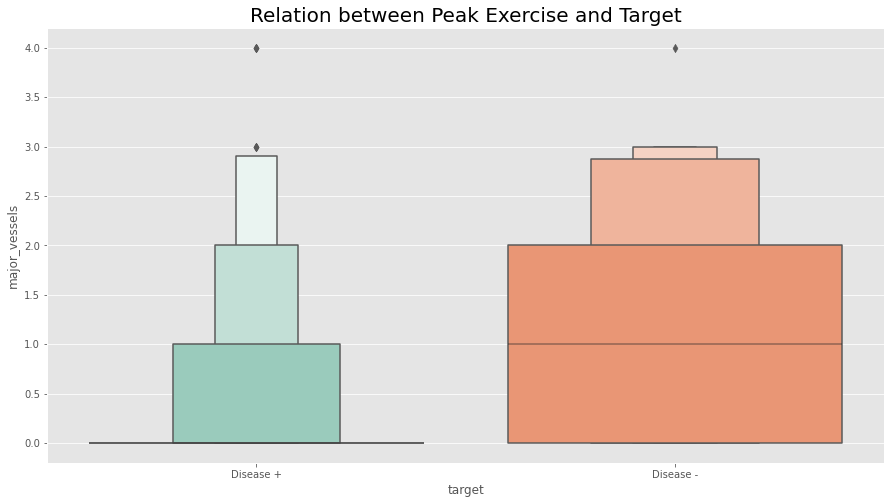

    J. Use a pair plot to understand the relationship between all the given variables.

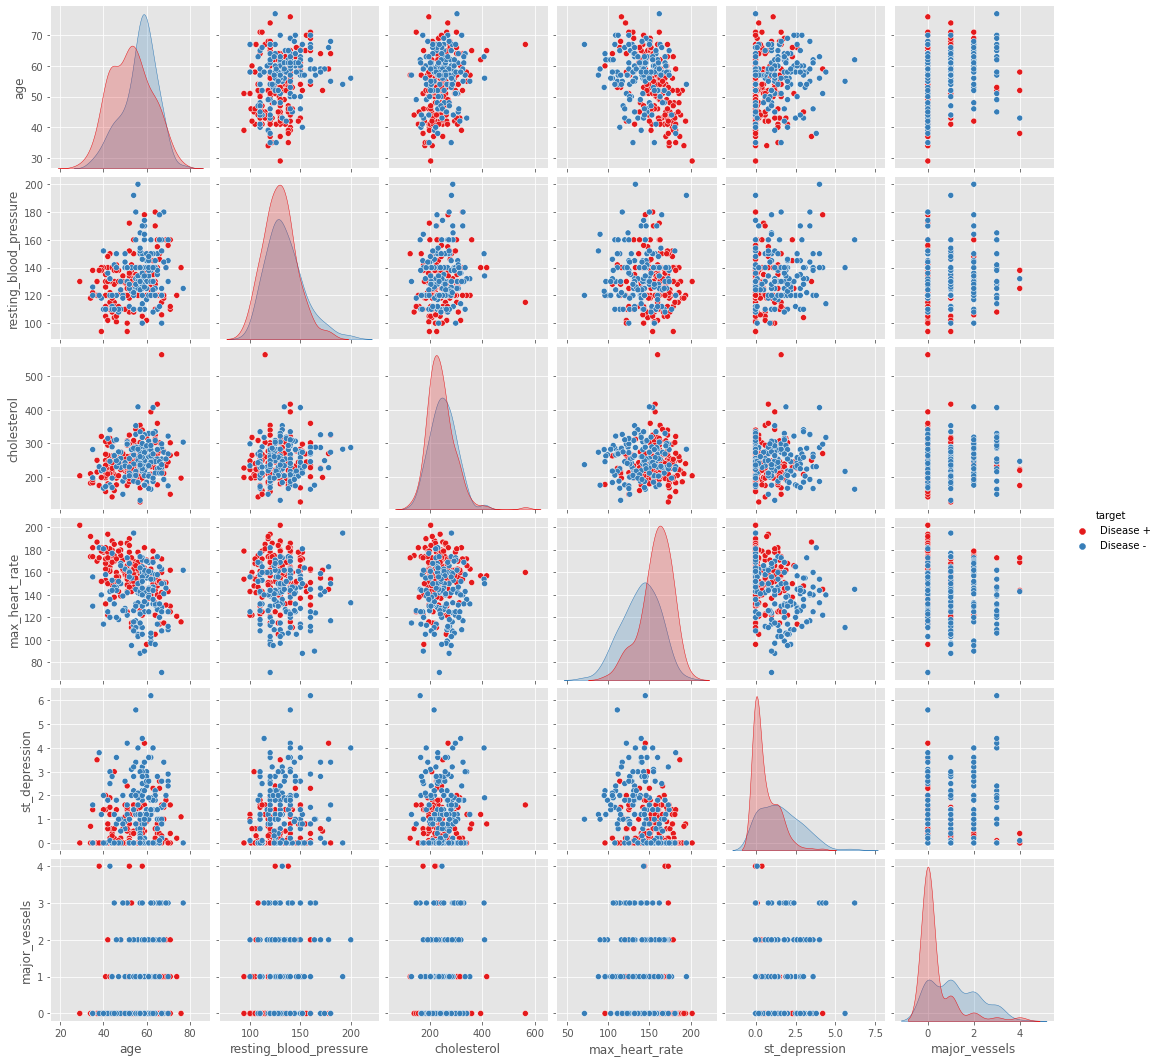

## apply logistic Regression

In [480]:
data.loc[data.target == 'Disease -', 'target']= 0
data.loc[data.target == 'Disease +', 'target']= 1
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,male,asymptomatic,145,233,> 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,< 120mg/ml,abnormal,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,< 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,< 120mg/ml,abnormal,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,< 120mg/ml,abnormal,163,yes,0.6,downsloping,0,fixed defect,1


In [490]:
data.loc[data.fasting_blood_sugar == '> 120mg/ml','fasting_blood_sugar'] = 1
data.loc[data.fasting_blood_sugar == '< 120mg/ml','fasting_blood_sugar'] = 0

data.loc[data.thalessimia == 'normal','thalessimia'] = 0
data.loc[data.thalessimia == 'fixed defect','thalessimia'] = 1
data.loc[data.thalessimia == 'reversable defect','thalessimia'] = 2

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,male,asymptomatic,145,233,1,normal,150,no,2.3,upsloping,0,0,1
1,37,male,non-anginal pain,130,250,0,abnormal,187,no,3.5,upsloping,0,1,1
2,41,female,atypical angina,130,204,0,normal,172,no,1.4,downsloping,0,1,1
3,56,male,atypical angina,120,236,0,abnormal,178,no,0.8,downsloping,0,1,1
4,57,female,typical angina,120,354,0,abnormal,163,yes,0.6,downsloping,0,1,1


In [481]:
data.target = data.target.astype("int64")
data.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: target
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


# Logistic Regression

In [493]:
# apply logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x = data[['age','thalessimia','fasting_blood_sugar','major_vessels']]

y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logregression = LogisticRegression(max_iter=1000)
logregression.fit(x_train, y_train)

y_pred = logregression.predict(x_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7049180327868853
[[21  5]
 [13 22]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        26
           1       0.81      0.63      0.71        35

    accuracy                           0.70        61
   macro avg       0.72      0.72      0.70        61
weighted avg       0.73      0.70      0.71        61



              precision    recall  f1-score   support

           0       0.82      0.89      0.85        45
           1       0.88      0.80      0.84        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



[[40  5]
 [ 9 37]]
